In [53]:
import numpy as np
from PIL import Image
import cv2
from scipy.linalg import null_space

In [39]:
img = cv2.imread("p1.jpg")

last_x = -1
last_y = -1
sx,sy = -1,-1

bak_img = img.copy()

break_flag = False

points = []

def draw_circle(event,x,y,flags,param):
    global last_x,last_y, bak_img, img, points, break_flag, sx,sy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        if last_x != -1:
            img = bak_img.copy()
            cv2.line(img, (last_x, last_y), (x,y), (0,0,255), 5)
            bak_img = img.copy()
        else:
            sx,sy = x,y
        last_x = x
        last_y = y
        points.append([x,y])

    elif event == cv2.EVENT_MOUSEMOVE:
        if last_x != -1:
            img = bak_img.copy()
            cv2.line(img, (last_x,last_y), (x,y), (0,0,255), 5)
    
    elif event == cv2.EVENT_RBUTTONDOWN:
        img = bak_img.copy()
        cv2.line(img, (last_x, last_y), (sx,sy), (0,0,255), 5)
        bak_img = img.copy()
        break_flag = True
        

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    if (cv2.waitKey(1) & 0xFF == 27) or break_flag:
        break
cv2.destroyAllWindows()

print(*points, sep="\n")

[530, 86]
[705, 234]
[656, 445]
[472, 515]


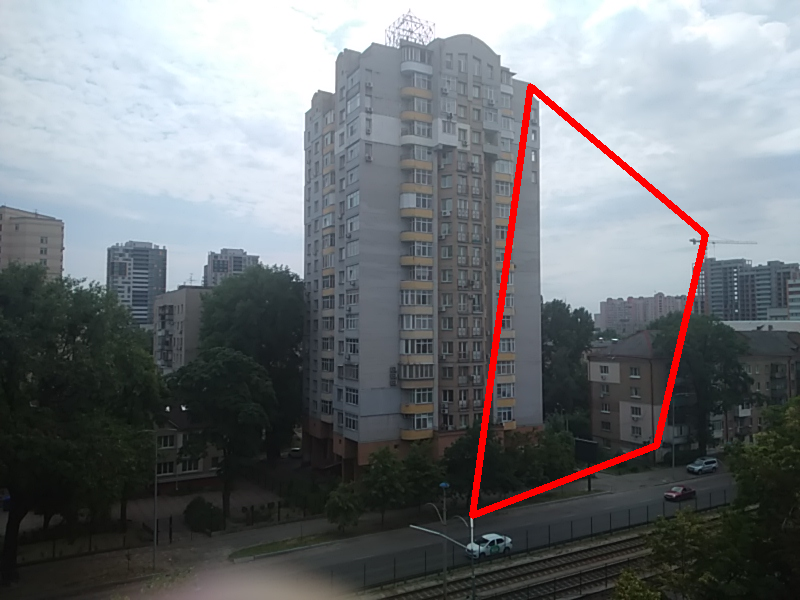

In [40]:
Image.fromarray(cv2.cvtColor(bak_img, cv2.COLOR_BGR2RGB))

In [42]:
points1 = points[::]

In [43]:
img = cv2.imread("p2.jpg")

last_x = -1
last_y = -1
sx,sy = -1,-1

bak_img = img.copy()

break_flag = False

points = []

def draw_circle(event,x,y,flags,param):
    global last_x,last_y, bak_img, img, points, break_flag, sx,sy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        if last_x != -1:
            img = bak_img.copy()
            cv2.line(img, (last_x, last_y), (x,y), (0,0,255), 5)
            bak_img = img.copy()
        else:
            sx,sy = x,y
        last_x = x
        last_y = y
        points.append([x,y])

    elif event == cv2.EVENT_MOUSEMOVE:
        if last_x != -1:
            img = bak_img.copy()
            cv2.line(img, (last_x,last_y), (x,y), (0,0,255), 5)
    
    elif event == cv2.EVENT_RBUTTONDOWN:
        img = bak_img.copy()
        cv2.line(img, (last_x, last_y), (sx,sy), (0,0,255), 5)
        bak_img = img.copy()
        break_flag = True
        

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    if (cv2.waitKey(1) & 0xFF == 27) or break_flag:
        break
cv2.destroyAllWindows()

print(*points, sep="\n")

[227, 86]
[382, 251]
[336, 441]
[146, 534]


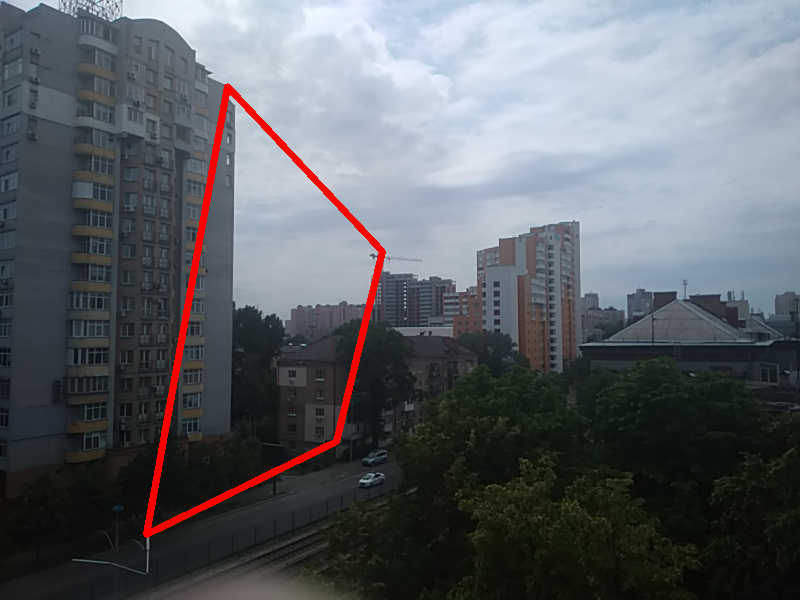

In [44]:
Image.fromarray(cv2.cvtColor(bak_img, cv2.COLOR_BGR2RGB))

In [45]:
points2 = points[::]

In [46]:
list_x = points1[::]
list_x_strich = points2[::]

In [48]:
X_big = np.zeros((8,9))
X_big.shape

(8, 9)

In [50]:
for i in range(4):
    x3d = np.array(list_x[i] + [1,])
    x3d_strich = np.array(list_x_strich[i] + [1,])
    zero3d = np.array([0,0,0])
    
    X_big[i*2] = np.concatenate([-x3d_strich, zero3d, x3d[0]*x3d_strich])
    X_big[i*2+1] = np.concatenate([zero3d, -x3d_strich, x3d[1]*x3d_strich])

In [58]:
h_vec = null_space(X_big)[:,0]
h_vec

array([ 1.16183210e-03,  8.36429292e-05,  9.86785572e-01, -7.02103570e-04,
        2.34273717e-03,  1.61984130e-01, -2.04100793e-06,  1.40385009e-08,
        2.83514819e-03])

In [60]:
h1 = h_vec[:3]
h2 = h_vec[3:6]
h3 = h_vec[6:]

In [61]:
H = np.array([h1,h2,h3])

In [62]:
H

array([[ 1.16183210e-03,  8.36429292e-05,  9.86785572e-01],
       [-7.02103570e-04,  2.34273717e-03,  1.61984130e-01],
       [-2.04100793e-06,  1.40385009e-08,  2.83514819e-03]])

In [66]:
la = (np.dot(H,x3d_strich)/x3d)[0]
H = H/la

In [67]:
np.dot(H,x3d_strich)/x3d

array([1., 1., 1.])

In [124]:
for i in range(4):
    x3d = np.array(list_x[i] + [1,])
    x3d_strich = np.array(list_x_strich[i] + [1,])
    
    print(x3d,np.dot(H,x3d_strich)/np.dot(H,x3d_strich)[-1], end="\n\n\n")

[530  86   1] [530.  86.   1.]


[705 234   1] [705. 234.   1.]


[656 445   1] [656. 445.   1.]


[472 515   1] [472. 515.   1.]




In [116]:
img_out = 255*np.ones([img.shape[0], img.shape[1]*2,3])
img_p1 = cv2.cvtColor(cv2.imread("p1.jpg"), cv2.COLOR_BGR2RGB)
img_p2 = cv2.cvtColor(cv2.imread("p2.jpg"), cv2.COLOR_BGR2RGB)

In [117]:
img_out[:img_p1.shape[0],:img_p1.shape[1],:] = img_p1

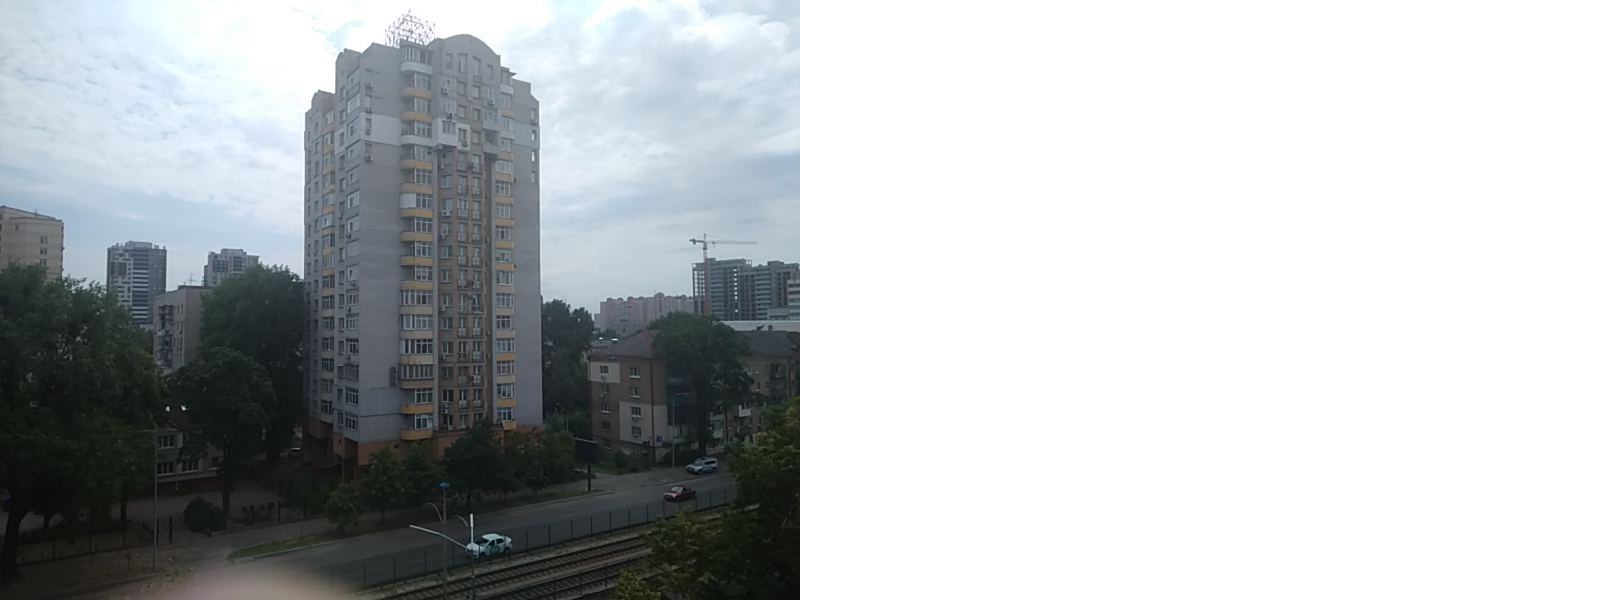

In [118]:
Image.fromarray(img_out.astype(np.uint8))

In [119]:
H_inv = np.linalg.inv(H)

In [137]:
img_out = 255*np.ones([img.shape[0]*2, img.shape[1]*2,3])
img_p1 = cv2.cvtColor(cv2.imread("p1.jpg"), cv2.COLOR_BGR2RGB)
img_p2 = cv2.cvtColor(cv2.imread("p2.jpg"), cv2.COLOR_BGR2RGB)

img_out[img_p1.shape[0]//2:img_p1.shape[0]+img_p1.shape[0]//2,:img_p1.shape[1],:] = img_p1

for x in range(img.shape[1]):
    for y in range(img.shape[0]):
        x3d_strich = np.array([x,y,1])
        x3d = np.dot(H, x3d_strich)
        x3d = x3d/x3d[2]
        if 0 < x3d[0] < img_out.shape[1] -1 and 0 < x3d[1]+img_p1.shape[0]//2 < img_out.shape[0] -1:
            img_out[int(x3d[1])+img_p1.shape[0]//2, int(x3d[0])] = img_p2[y,x] 

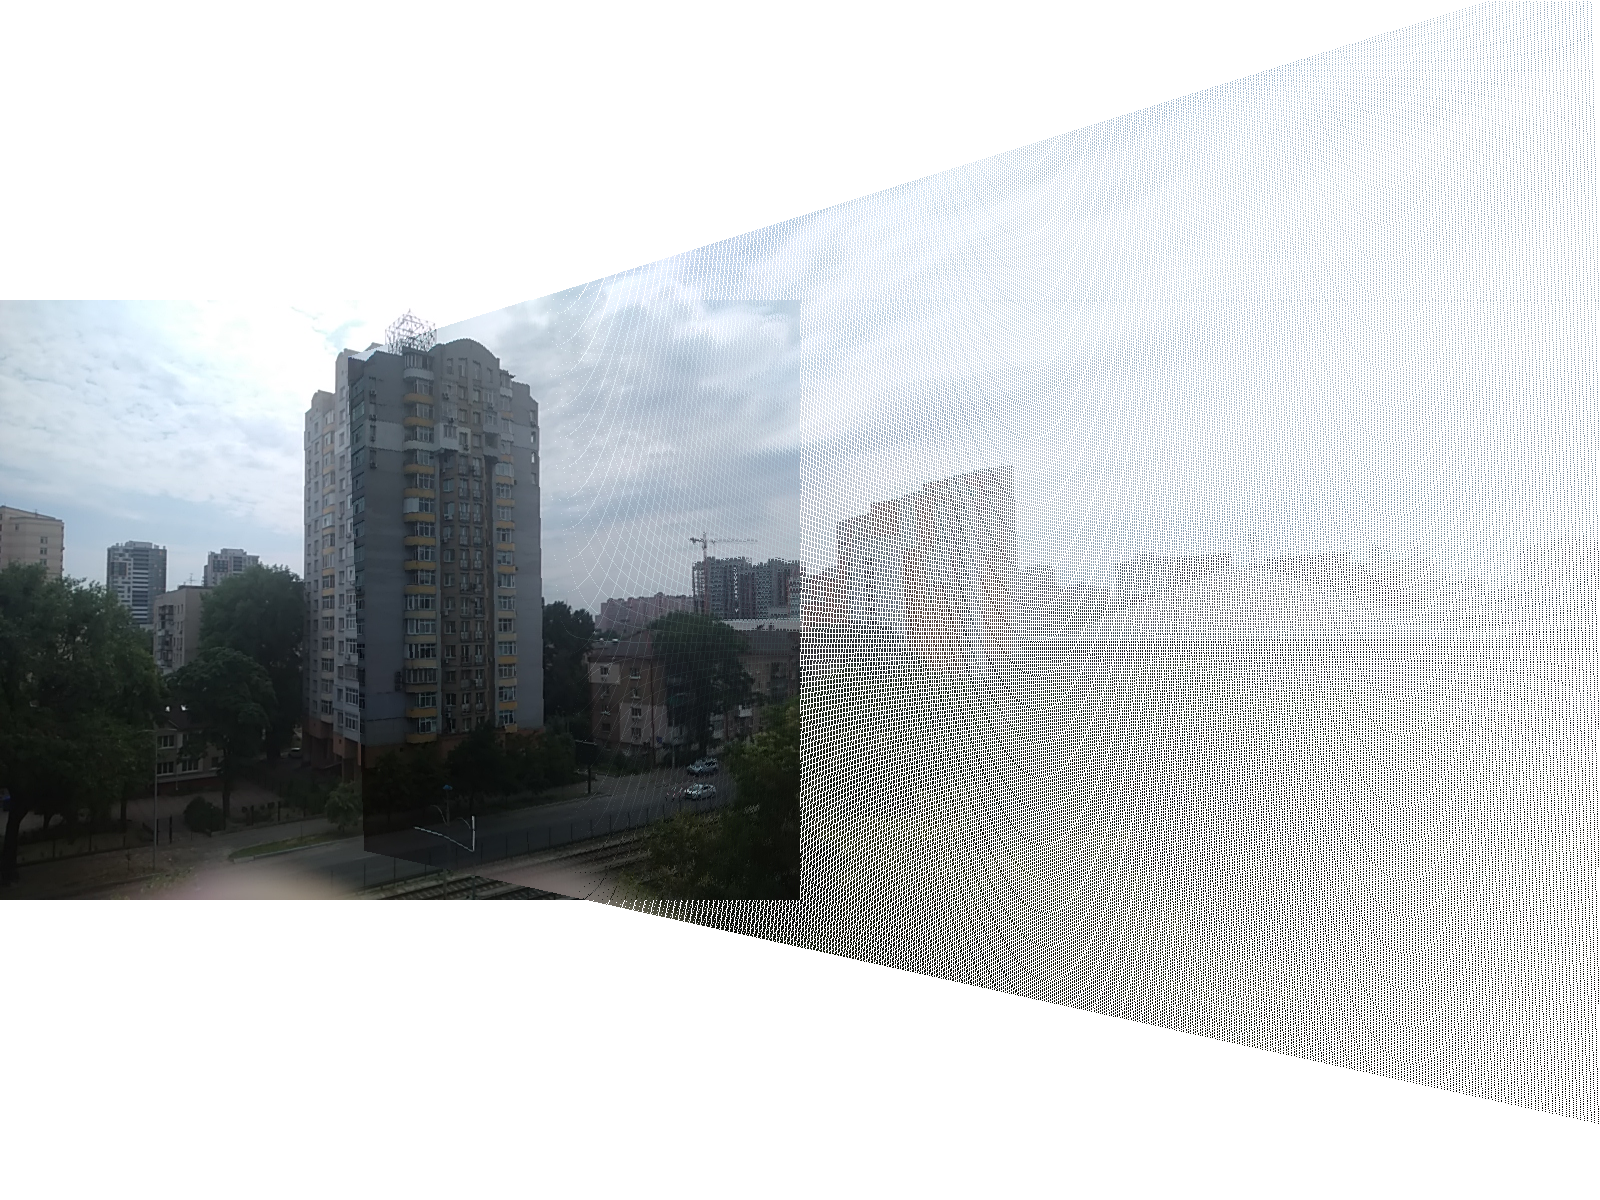

In [138]:
Image.fromarray(img_out.astype(np.uint8))

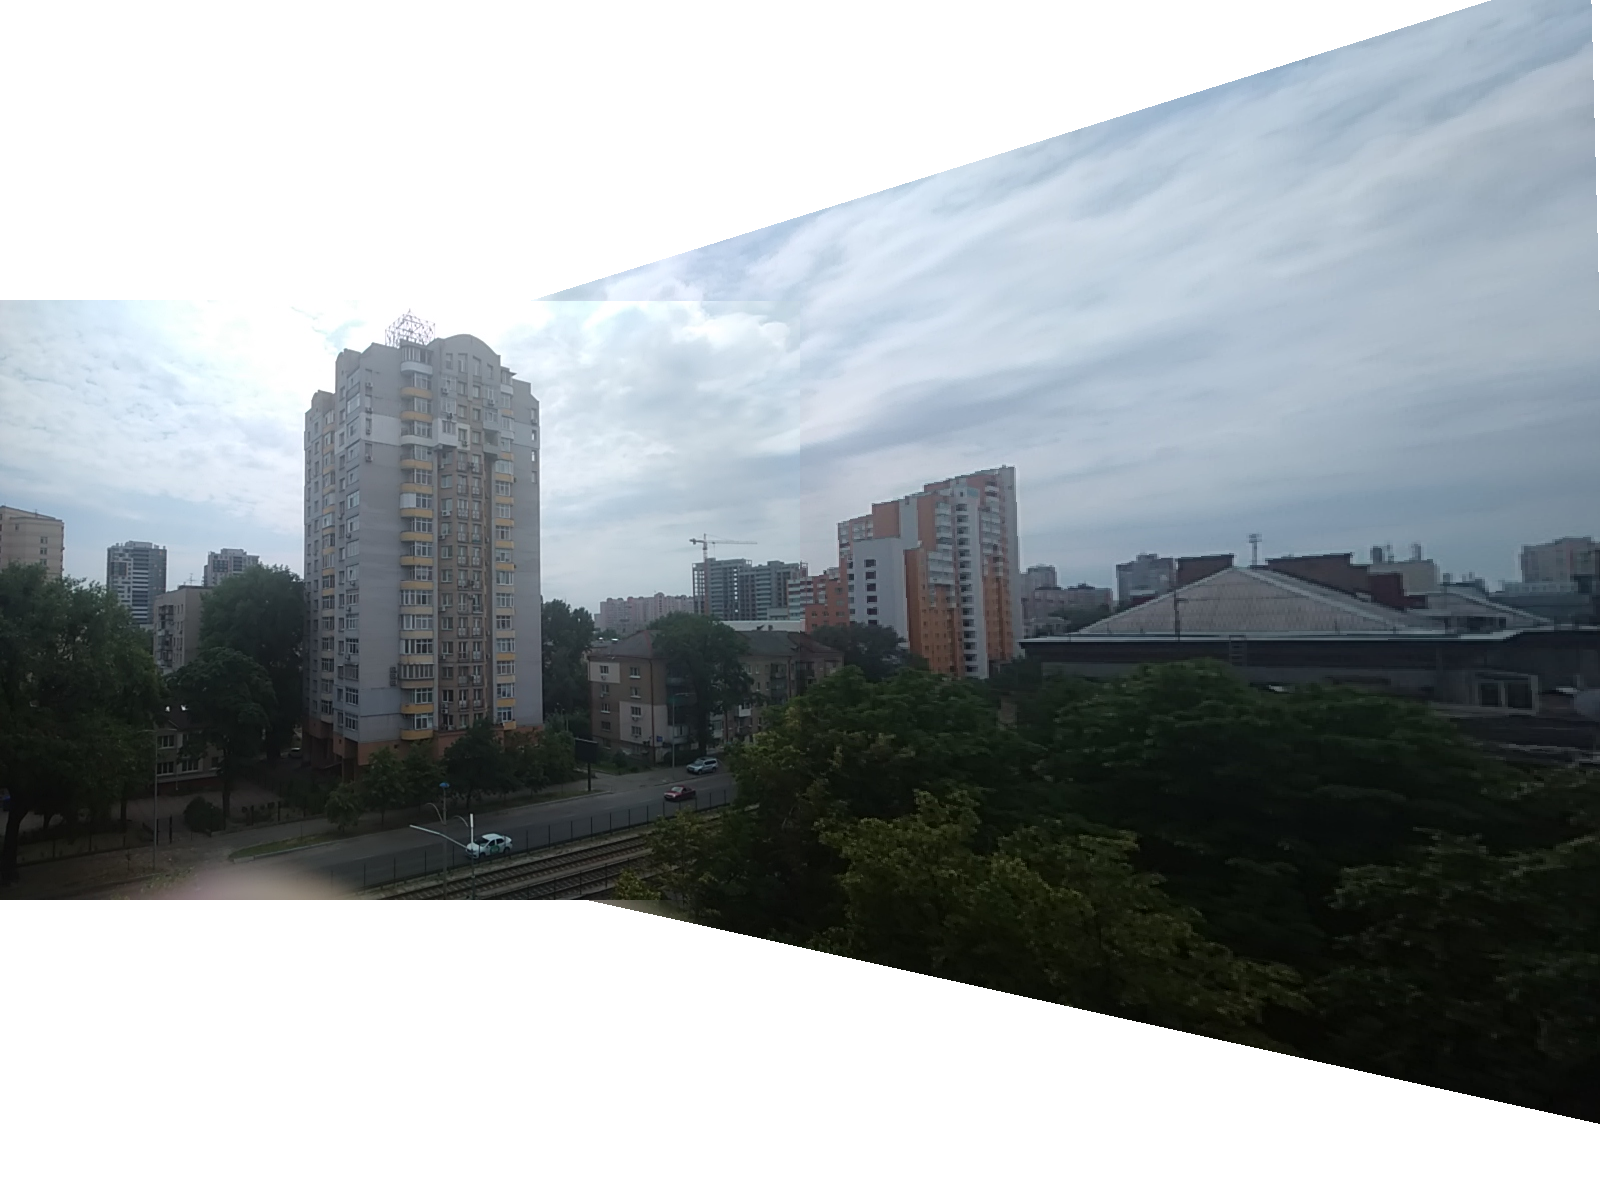

In [148]:
img_out = 255*np.ones([img.shape[0]*2, img.shape[1]*2,3])
img_p1 = cv2.cvtColor(cv2.imread("p1.jpg"), cv2.COLOR_BGR2RGB)
img_p2 = cv2.cvtColor(cv2.imread("p2.jpg"), cv2.COLOR_BGR2RGB)

img_out[img_p1.shape[0]//2:img_p1.shape[0]+img_p1.shape[0]//2,:img_p1.shape[1],:] = img_p1

for x in range(img_out.shape[1]):
    for y in range(img_out.shape[0]):
        if img_p1.shape[0]//2 <y<img_p1.shape[0]+img_p1.shape[0]//2 and x<img_p1.shape[1]:
            continue
        x3d_strich = np.array([x,y-img_p1.shape[0]//2,1])
        x3d = np.dot(H_inv, x3d_strich)
        x3d = x3d/x3d[2]
        if 0 < x3d[0] < img_p2.shape[1] -1 and 0 < x3d[1] < img_p2.shape[0] -1:
            img_out[y,x] = img_p2[int(x3d[1]), int(x3d[0])]
Image.fromarray(img_out.astype(np.uint8))

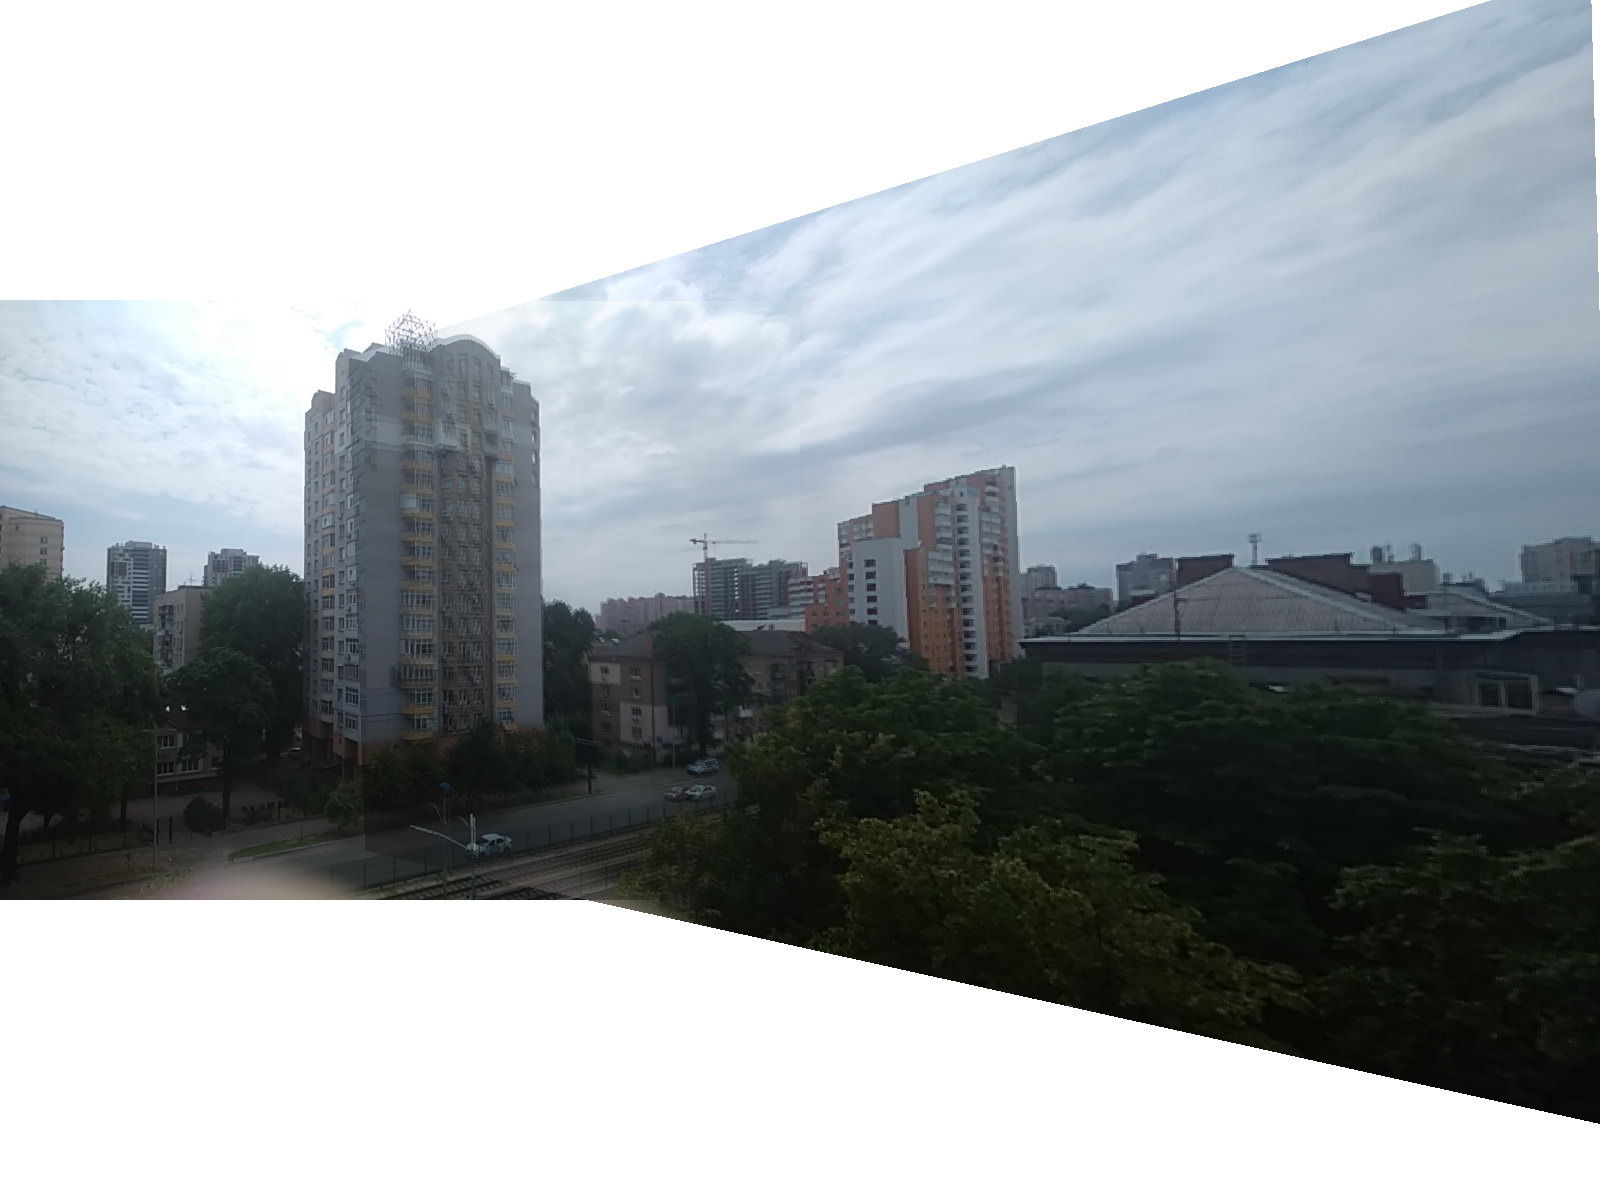

In [152]:
img_out = 255*np.ones([img.shape[0]*2, img.shape[1]*2,3])
img_p1 = cv2.cvtColor(cv2.imread("p1.jpg"), cv2.COLOR_BGR2RGB)
img_p2 = cv2.cvtColor(cv2.imread("p2.jpg"), cv2.COLOR_BGR2RGB)

img_out[img_p1.shape[0]//2:img_p1.shape[0]+img_p1.shape[0]//2,:img_p1.shape[1],:] = img_p1

for x in range(img_out.shape[1]):
    for y in range(img_out.shape[0]):

        x3d_strich = np.array([x,y-img_p1.shape[0]//2,1])
        x3d = np.dot(H_inv, x3d_strich)
        x3d = x3d/x3d[2]
        if 0 < x3d[0] < img_p2.shape[1] -1 and 0 < x3d[1] < img_p2.shape[0] -1:
            
            if img_p1.shape[0]//2 <y<img_p1.shape[0]+img_p1.shape[0]//2 and x<img_p1.shape[1]:
                img_out[y,x] = (img_p2[int(x3d[1]), int(x3d[0])] + img_out[y,x])//2
            else:
                img_out[y,x] = img_p2[int(x3d[1]), int(x3d[0])]
Image.fromarray(img_out.astype(np.uint8))